# Capítulo 10 — Projeto de Sistemas de Controle com Realimentação
## PARTE 2 — Aplicações, Lag, Lead, Lag-Lead, Nyquist e Monte-Carlo



In [3]:
# Instala a biblioteca python-control
!pip install control --quiet

import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

plt.rcParams['figure.figsize'] = (8,5)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 13.4 MB/s eta 0:00:00


In [4]:
G = ctrl.tf(1, [1,6,8,0])

## Compensador de Avanço (Lead)

Usado para:
- aumentar amortecimento
- reduzir overshoot
- aumentar rapidez

Forma:
\[
D(s) = \frac{s+z}{s+p}, \quad z > p
\]


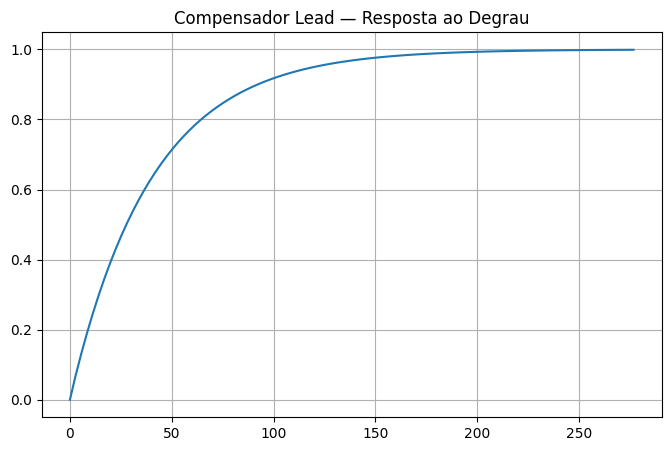

In [5]:
z = 1
p = 5
D_lead = ctrl.tf([1,z],[1,p])

T_lead = ctrl.feedback(D_lead*G, 1)

t,y = ctrl.step_response(T_lead)
plt.plot(t,y)
plt.title("Compensador Lead — Resposta ao Degrau")
plt.grid()
plt.show()


## Compensador de Atraso (Lag)

Usado quando o objetivo é:
- melhorar erro de regime
- manter comportamento transitório

Aqui usamos: p > z.


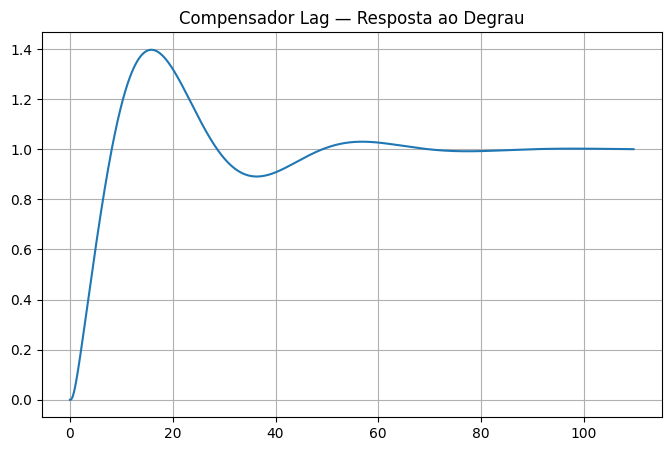

In [6]:
z = 0.2
p = 0.01
D_lag = ctrl.tf([1,z],[1,p])

T_lag = ctrl.feedback(D_lag*G,1)

t,y = ctrl.step_response(T_lag)
plt.plot(t,y)
plt.title("Compensador Lag — Resposta ao Degrau")
plt.grid()
plt.show()


## Atraso–Avanço (Lag–Lead)

Combina vantagens:
- precisão do lag  
- velocidade do lead  

Muito comum em automação industrial.


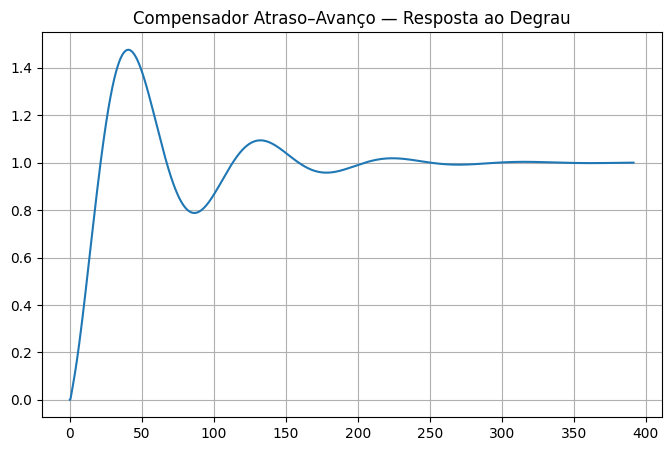

In [7]:
D_laglead = D_lead * D_lag
T2 = ctrl.feedback(D_laglead * G, 1)

t,y = ctrl.step_response(T2)
plt.plot(t,y)
plt.title("Compensador Atraso–Avanço — Resposta ao Degrau")
plt.grid()
plt.show()


## Lugar das Raízes do Sistema Compensado

O compensador altera:
- localização dos polos
- velocidade
- estabilidade

Aqui visualizamos o novo LGR.


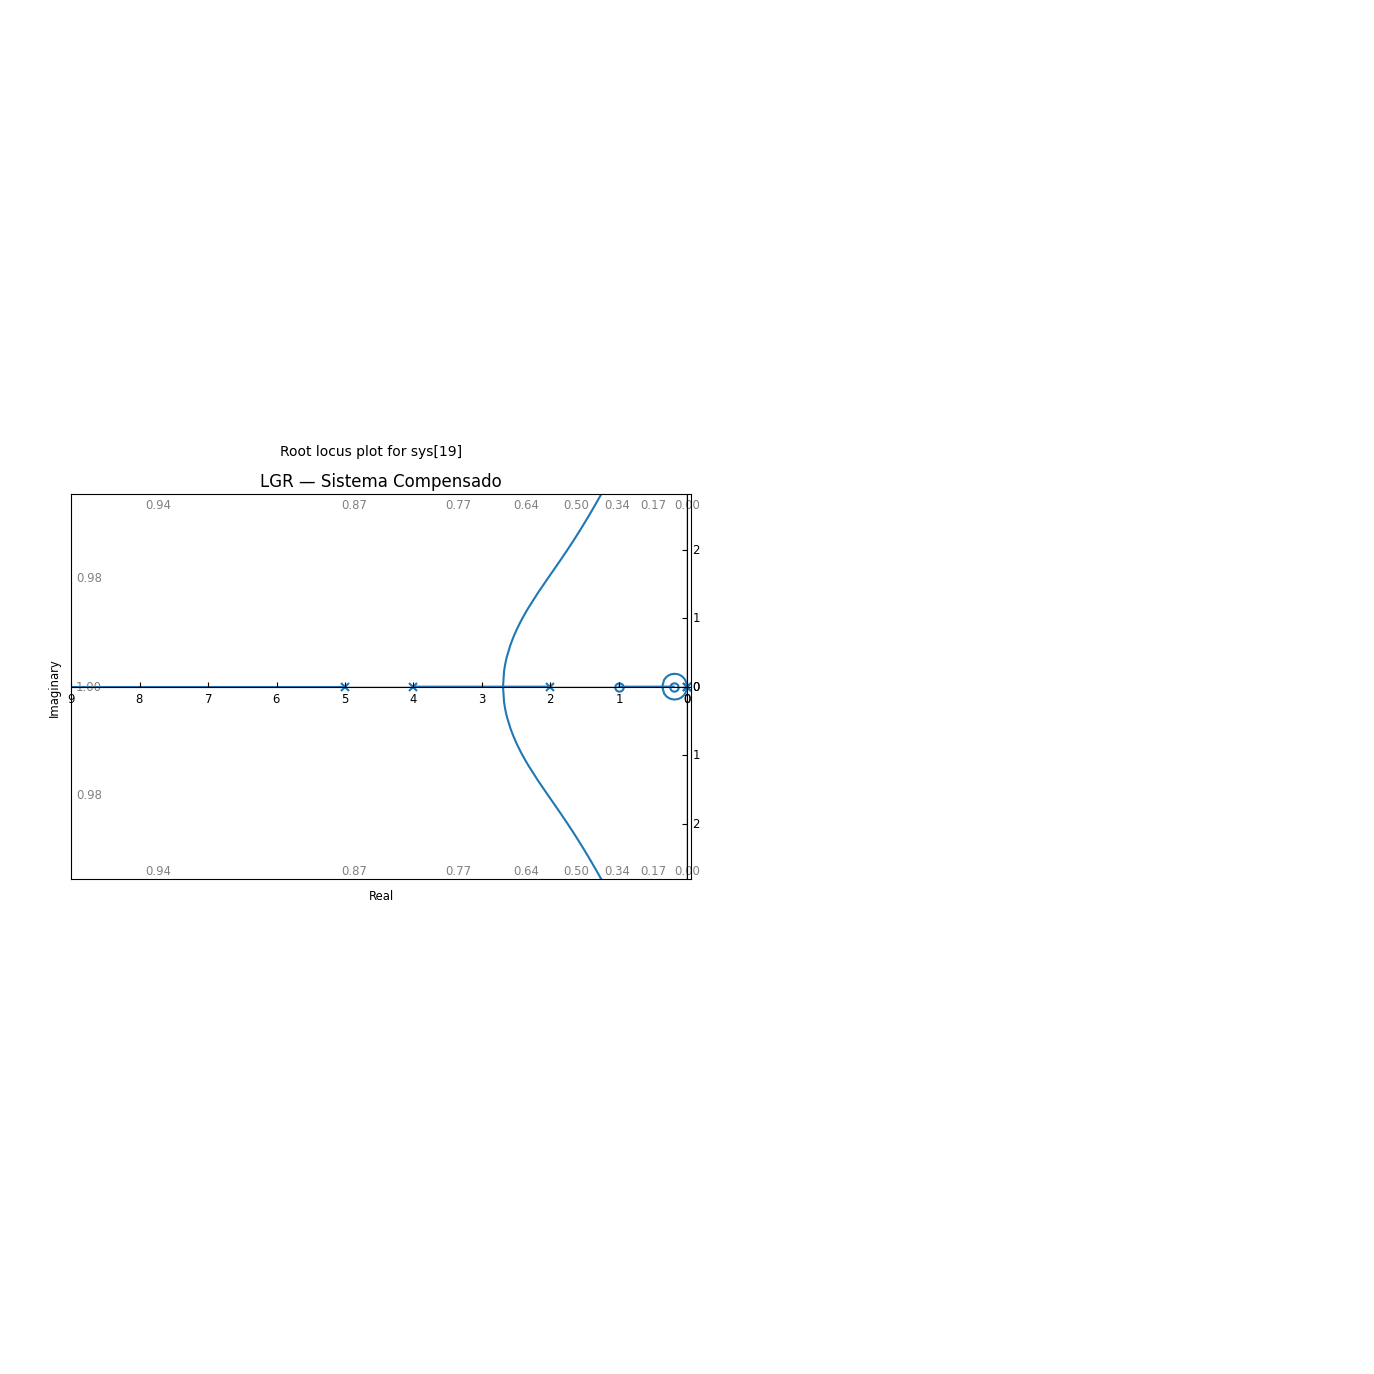

In [8]:
plt.figure()
ctrl.root_locus(D_laglead*G)
plt.title("LGR — Sistema Compensado")
plt.grid()
plt.show()


## Nyquist do Sistema

O critério de Nyquist permite:
- verificar estabilidade absoluta
- avaliar robustez
- projetar compensadores por frequência


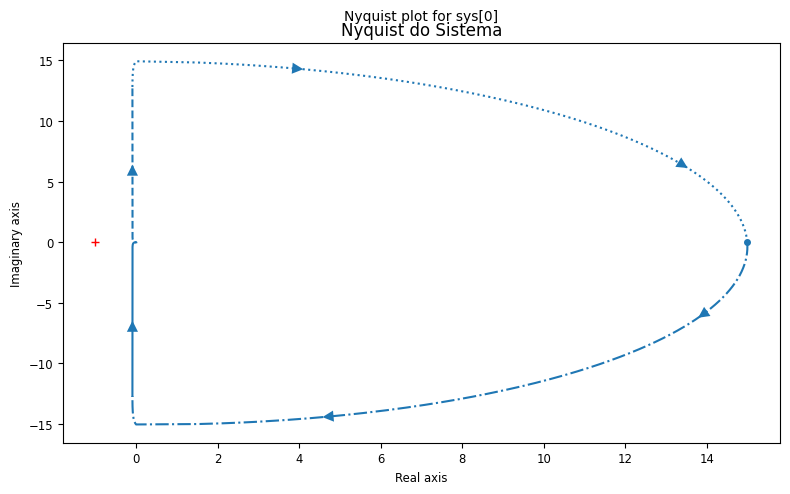

In [9]:
ctrl.nyquist_plot(G)
plt.title("Nyquist do Sistema")
plt.grid()
plt.show()


## Comparando Controladores com Diferentes Ganhos

Aqui comparamos:
- planta original
- diferentes valores de K
- efeito do ganho na resposta transitória


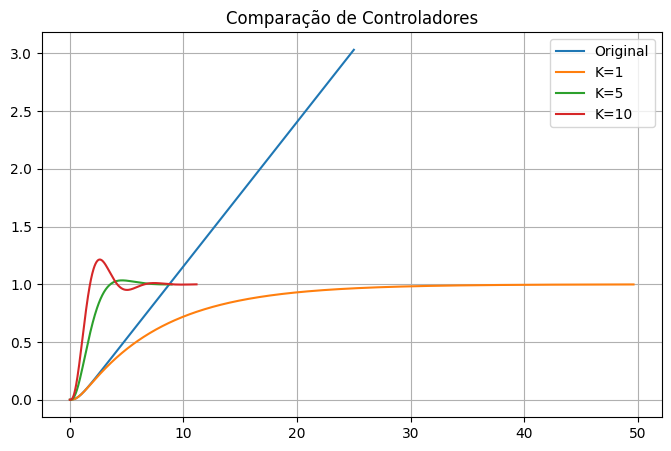

In [10]:
Ks = [1,5,10]
sistemas = [G]
labels = ["Original"]

for K in Ks:
    sistemas.append(ctrl.feedback(K*G, 1))
    labels.append(f"K={K}")

plt.figure()
for sys,label in zip(sistemas, labels):
    t,y = ctrl.step_response(sys)
    plt.plot(t,y, label=label)

plt.legend()
plt.title("Comparação de Controladores")
plt.grid()
plt.show()


## Análise de Incerteza (Monte-Carlo)

Simulamos 100 variações aleatórias no parâmetro p do denominador.

Isso mostra:
- robustez  
- sensibilidade da resposta  
- comportamento realista diante de incertezas


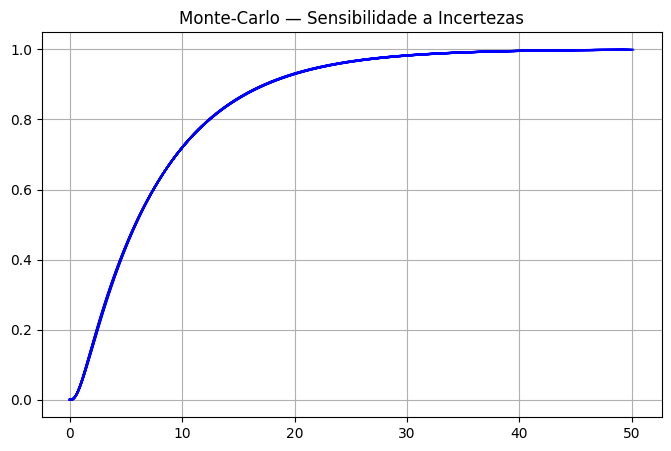

In [11]:
import random

N = 100
plt.figure()

for _ in range(N):
    p_variation = 6 + np.random.uniform(-0.5,0.5)
    Gv = ctrl.tf(1,[1,p_variation,8,0])
    T = ctrl.feedback(Gv,1)
    t,y = ctrl.step_response(T)
    plt.plot(t,y,'b',alpha=0.1)

plt.title("Monte-Carlo — Sensibilidade a Incertezas")
plt.grid()
plt.show()
